<a href="https://colab.research.google.com/github/nshin130/wineQuality/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:

redwine = pd.read_csv('/content/winequality-red.csv', sep=';')
redwine.head()

col = redwine.columns
col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
redwine.columns = ['fa','va','ca','rs','ch','fsd','tsd','den','pH','sul','a','quality']
redwine.head()

,fa,va,ca,rs,ch,fsd,tsd,den,pH,sul,a,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
redwine = redwine.drop(['fa','ca','rs','den'], axis=1)

redwine.head()

,va,ch,fsd,tsd,pH,sul,a,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


In [ ]:
redwine.index = redwine.index+1

redwine.head()

,va,ch,fsd,tsd,pH,sul,a,quality
1,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
2,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
3,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
4,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
5,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


In [ ]:
from sklearn.model_selection import train_test_split

x = redwine[['va','ch','fsd','tsd','pH','sul','a']]
y = redwine[['quality']]

# splitting dataset for training and testing to see how predictive it is
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [ ]:
# creating Model

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
myDrink = [[0.8, 0.056, 14, 40, 3.16, 0.58, 9.5]]
myQuality = mlr.predict(myDrink)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_predict = mlr.predict(x_test)

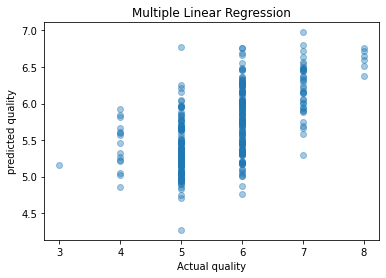

In [ ]:
plt.scatter(y_test,y_predict, alpha=0.4)
plt.xlabel("Actual quality")
plt.ylabel('predicted quality')
plt.title('Multiple Linear Regression')
plt.show()

In [ ]:
import scipy.stats as stats

stats.probplot(x)

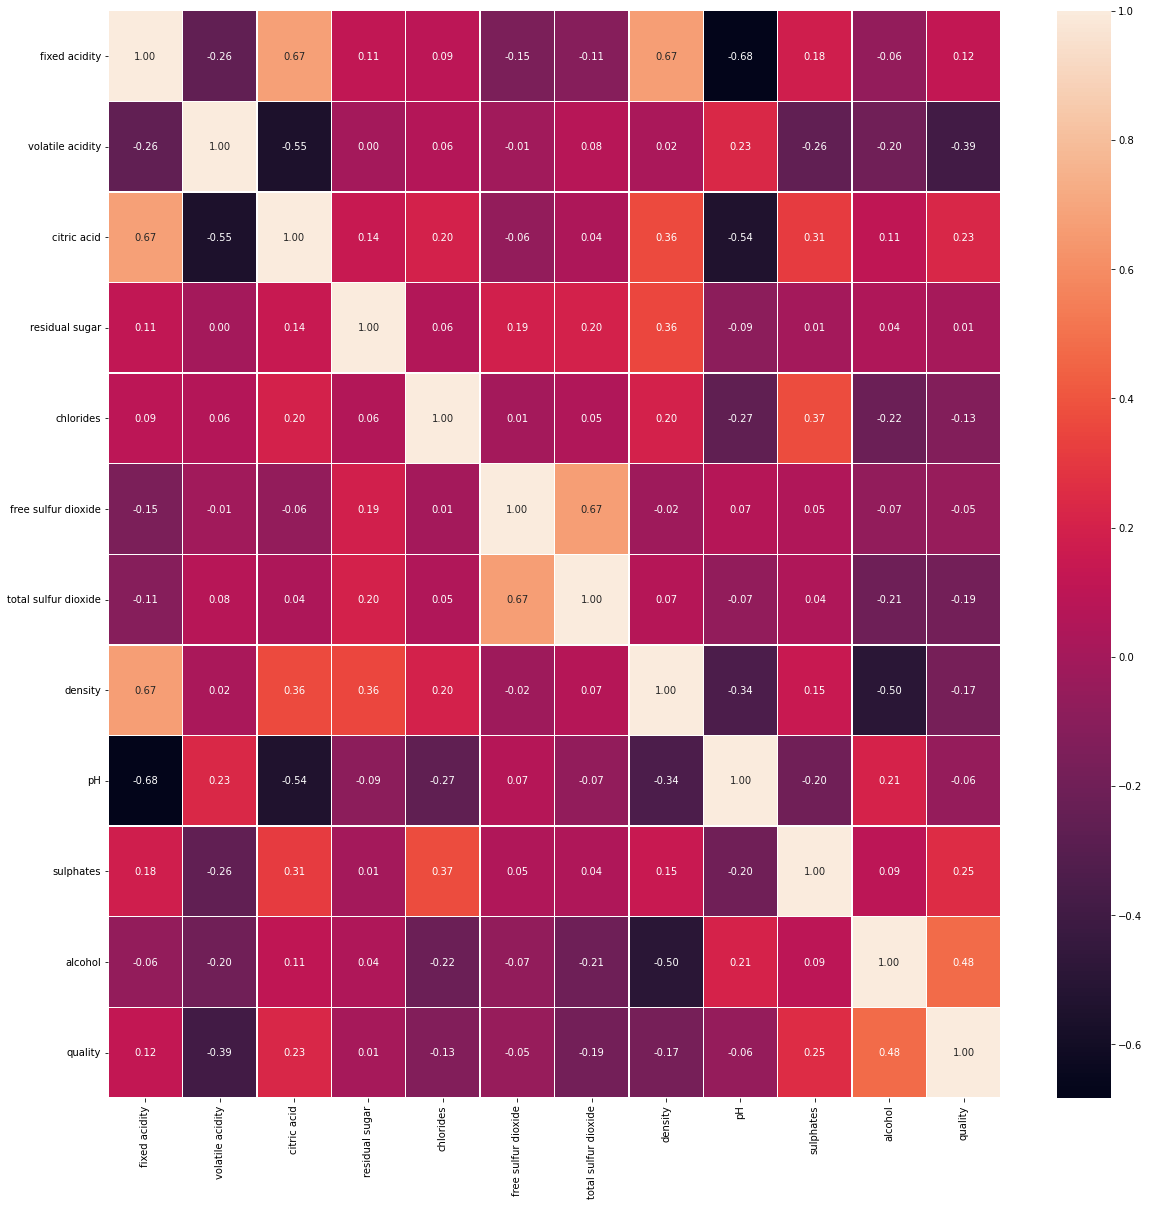

In [ ]:
corr = redwine.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5)

In [ ]:
model = ols('quality ~ fa + va + ca + rs + ch +fsd + tsd + den + pH + sul + a', data = redwine).fit()
print(model.summary())

In [ ]:
model = ols('quality ~ fa + va + ca + ch +fsd + tsd + den + pH + sul + a', data = redwine).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.35
Date:                Fri, 06 May 2022   Prob (F-statistic):          3.32e-146
Time:                        02:51:35   Log-Likelihood:                -1569.7
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3221.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2233     17.026      0.483      0.6

In [ ]:
anova = sm.stats.anova_lm(model, typ=2)
print(anova)

              sum_sq      df           F        PR(>F)
fa          0.125819     1.0    0.299592  5.842150e-01
va         33.836332     1.0   80.568938  7.732950e-19
ca          0.588650     1.0    1.401656  2.366237e-01
ch          8.435988     1.0   20.087243  7.928713e-06
fsd         1.965920     1.0    4.681124  3.064452e-02
tsd         8.290195     1.0   19.740090  9.485980e-06
den         0.020751     1.0    0.049411  8.241195e-01
pH          2.983733     1.0    7.104676  7.766247e-03
sul        26.591671     1.0   63.318409  3.316041e-15
a          67.634053     1.0  161.045938  3.219950e-35
Residual  666.908324  1588.0         NaN           NaN


In [ ]:
y = redwine['quality']
x = redwine[['fa', 'va','ca','ch','fsd','tsd','den','pH','sul','a']]

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
